## Analysis of LCS Algorithms
This notebook provides an overview of the performance of three implementations of the Longest Common Subsequence (LCS) problem. These implementations are:

1. LCS Recursive
A straightforward recursive approach that explores all possible subsequences, leading to exponential time complexity.

2. LCS Memoization
An optimized version of the recursive algorithm that uses memoization to store previously computed subproblems, improving the time complexity significantly.

3. LCS Bottom-Up (Dynamic Programming)
A bottom-up dynamic programming approach that uses a table to iteratively solve subproblems, achieving the best performance in terms of time complexity.

In [10]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
benchmark_file = "../lcs_benchmark_results.csv"  # The raw benchmark results
grouped_file = "../lcs_results_grouped.csv"      # The aggregated results
df = pd.read_csv(benchmark_file)
grouped_df = pd.read_csv(grouped_file)


# Data Preview:

Display a small portion of the dataset to ensure everything loaded correctly.

In [11]:
# Preview Data
print("Raw Benchmark Data:")
print(df.head())

Raw Benchmark Data:
          function      time    memory  lcs_length  comparisons  move_count  \
0    lcs_recursive  0.206422  0.000000           0           10           0   
1  lcs_memoization  0.201633  0.011719           5           10           0   
2    lcs_bottom_up  0.201114  0.000000           5          100          24   
3    lcs_recursive  0.223891  0.000000           0           10           0   
4  lcs_memoization  0.202645  0.000000           4           10           0   

         algorithm  size  experiment  
0    lcs_recursive    10           1  
1  lcs_memoization    10           1  
2    lcs_bottom_up    10           1  
3    lcs_recursive    10           2  
4  lcs_memoization    10           2  


# Visualization:

- Time Complexity: Line plot to compare algorithms for varying input sizes.
- Space Complexity: Line plot showing memory usage for each algorithm.
- Number of Comparisons: Bar plot summarizing the average number of comparisons for different input sizes.

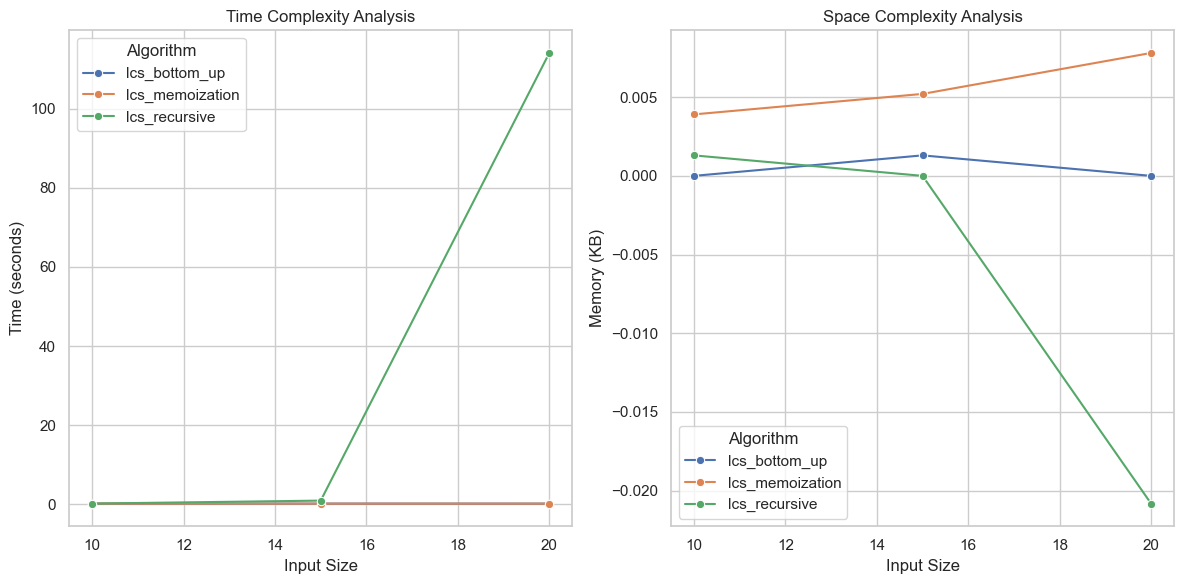

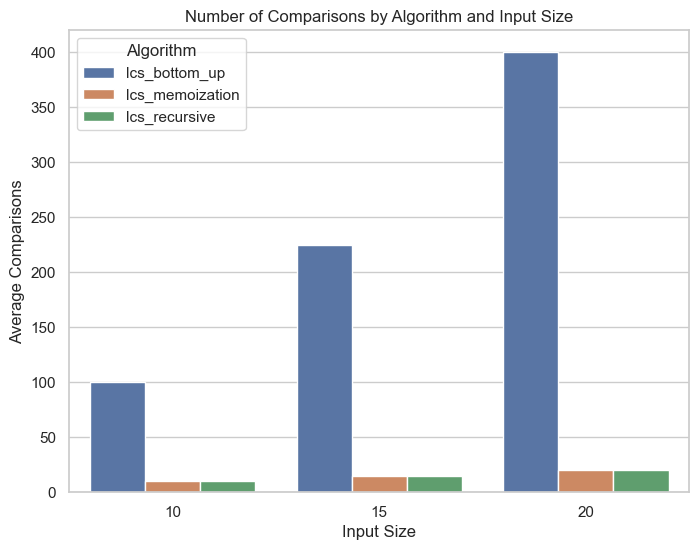

In [9]:
# Visualization Setup
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Time Complexity Analysis
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_df, x="size", y="time", hue="algorithm", marker="o")
plt.title("Time Complexity Analysis")
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.legend(title="Algorithm")

# Space Complexity Analysis
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_df, x="size", y="memory", hue="algorithm", marker="o")
plt.title("Space Complexity Analysis")
plt.xlabel("Input Size")
plt.ylabel("Memory (KB)")
plt.legend(title="Algorithm")

plt.tight_layout()
plt.show()

# Number of Comparisons Analysis
# This is derived from the raw dataset, not the aggregated one.
comparison_df = df.groupby(['algorithm', 'size'])['comparisons'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_df, x="size", y="comparisons", hue="algorithm")
plt.title("Number of Comparisons by Algorithm and Input Size")
plt.xlabel("Input Size")
plt.ylabel("Average Comparisons")
plt.legend(title="Algorithm")
plt.show()
